# **Przygotowanie środowiska** 🛠️

Przed rozpoczęciem ćwiczeń upewnij się, że masz zainstalowane wszystkie niezbędne biblioteki.

## **Instalacja bibliotek**

Uruchom poniższą komórkę, aby zainstalować wszystkie potrzebne biblioteki:

In [ ]:
# Instalacja niezbędnych bibliotek
# Uruchom tę komórkę, jeśli biblioteki nie są jeszcze zainstalowane

# !pip install pandas numpy matplotlib seaborn scikit-learn

# Alternatywnie, jeśli używasz conda:
# !conda install pandas numpy matplotlib seaborn scikit-learn -c conda-forge

print("✅ Instrukcje instalacji gotowe!")
print("Jeśli wszystkie biblioteki są już zainstalowane, możesz przejść do następnej komórki.")

# **Ćwiczenia praktyczne: Uczenie maszynowe z danymi Titanic**

![Titanic](https://upload.wikimedia.org/wikipedia/commons/thumb/f/fd/RMS_Titanic_3.jpg/800px-RMS_Titanic_3.jpg)

## **Jak rozwiązywać te ćwiczenia?** 📝

**🔴 WAŻNE:** Ten notebook zawiera **placeholdery kodu z podpowiedziami** zamiast gotowych rozwiązań!

### **Sposób pracy:**
1. **Przeczytaj zadanie** i zrozum co masz zrobić
2. **Sprawdź podpowiedzi** w komentarzach TODO
3. **Usuń znak `#`** przed liniami kodu, które chcesz uruchomić
4. **Uzupełnij brakujące części** oznaczone jako `...`
5. **Uruchom komórkę** i sprawdź wyniki
6. **Odpowiedz na pytania** analityczne w oznaczonych miejscach

### **Przykład:**
```python
# TODO: Wczytaj dane
# titanic = sns.load_dataset('titanic')  # <- usuń # i uruchom
```

---

## **Cel ćwiczenia**

W tym notebooku przecwiczymy wszystkie kluczowe koncepty uczenia maszynowego poznane w `03a_Wprowadzenie_do_ML.ipynb` na praktycznym przykładzie **przewidywania przeżywalności pasażerów Titanica**.

Będziesz pracować z rzeczywistymi danymi historycznymi i przejdziesz przez cały proces uczenia maszynowego:
- 📊 **Eksploruję danych** i wizualizację
- 🔧 **Przygotowanie danych** do modelowania
- 🤖 **Trenowanie modeli** klasyfikacyjnych
- 📈 **Ocenę jakości modeli** różnymi metrykami
- 🎯 **Analizę overfitting vs underfitting**
- 🔄 **Walidację krzyżową**

---

### **O zbiorze danych Titanic**

Zbiór zawiera informacje o 891 pasażerach Titanica wraz z informacją, czy przeżyli katastrofę (1) czy nie (0). To klasyczny problem **klasyfikacji binarnej**.

**Cechy dostępne:**
- `Pclass` - klasa biletu (1 = pierwsza, 2 = druga, 3 = trzecia)
- `Sex` - płeć pasażera
- `Age` - wiek pasażera
- `SibSp` - liczba rodzeństwa/małżonków na pokładzie
- `Parch` - liczba rodziców/dzieci na pokładzie
- `Fare` - cena biletu
- `Embarked` - port zaokrętowania (C = Cherbourg, Q = Queenstown, S = Southampton)

**Zmienna docelowa:**
- `Survived` - czy pasażer przeżył (1 = tak, 0 = nie)

In [1]:
# Zadanie: Zaimportuj niezbędne biblioteki
# Podpowiedź: Będziesz potrzebować pandas, numpy, matplotlib.pyplot, seaborn
# oraz modułów z sklearn (model_selection, preprocessing, ensemble, linear_model, tree, neighbors, metrics)

# TODO 1: Zaimportuj pandas jako pd
import pandas as pd
# TODO 2: Zaimportuj numpy jako np
import numpy as np
# TODO 3: Zaimportuj matplotlib.pyplot jako plt
import matplotlib.pyplot as plt
# TODO 4: Zaimportuj seaborn jako sns
import seaborn as sns
# TODO 5: Z sklearn.model_selection zaimportuj: train_test_split, cross_val_score
from sklearn.model_selection import train_test_split, cross_val_score
# TODO 6: Z sklearn.preprocessing zaimportuj: LabelEncoder, StandardScaler
from sklearn.preprocessing import LabelEncoder, StandardScaler
# TODO 7: Z sklearn.ensemble zaimportuj: RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
# TODO 8: Z sklearn.linear_model zaimportuj: LogisticRegression
from sklearn.linear_model import LogisticRegression
# TODO 9: Z sklearn.tree zaimportuj: DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
# TODO 10: Z sklearn.neighbors zaimportuj: KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier
# TODO 11: Z sklearn.metrics zaimportuj: accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
# TODO 12: Ustaw styl wykresów na 'default' używając plt.style.use()
plt.style.use('default')
# TODO 13: Ustaw paletę kolorów seaborn na "husl" używając sns.set_palette()
sns.set_palette("husl")
# Ukryj ostrzeżenia (już gotowe)
import warnings
warnings.filterwarnings('ignore')

## **Zadanie 1: Wczytanie i pierwsza eksploracja danych** 🔍

Zacznij od podstawowej eksploracji zbioru danych Titanic.

In [24]:
# Zadanie 1: Wczytanie i eksploracja danych

# TODO 1.1: Wczytaj dane Titanic z seaborn
# Podpowiedź: użyj sns.load_dataset('titanic') i przypisz do zmiennej titanic
titanic = sns.load_dataset('titanic')
# TODO 1.2: Sprawdź rozmiar danych
# Podpowiedź: użyj atrybutu .shape aby zobaczyć liczbę wierszy i kolumn
print("=== PODSTAWOWE INFORMACJE O ZBIORZE ===")
print("liczba wierszy i kolumn:", titanic.shape)
# TODO 1.3: Wyświetl pierwsze 5 wierszy
# Podpowiedź: użyj metody .head() aby zobaczyć strukture danych
print("\n=== PIERWSZE 5 WIERSZY ===")
print(titanic.head(5))
# TODO 1.4: Sprawdź informacje o kolumnach
# Podpowiedź: użyj metody .info() aby zobaczyć typy danych i brakujące wartości
print("\n=== INFORMACJE O KOLUMNACH ===")
display(titanic.info())
# TODO 1.5: Sprawdź brakujące wartości
# Podpowiedź: użyj .isnull().sum() i wyfiltruj tylko te > 0
print("\n=== BRAKUJĄCE WARTOŚCI ===")
missing_values = titanic.isnull().sum()
missing_values_filtered = missing_values[missing_values > 0]
display(missing_values)
# TODO 1.6: Pokaż statystyki opisowe
# Podpowiedź: użyj metody .describe() dla zmiennych numerycznych
print("\n=== STATYSTYKI OPISOWE ===")
display(titanic.describe())
# TODO 1.7: Wyświetl unikalne wartości dla zmiennych kategorycznych
# Podpowiedź: dla kolumn jak 'sex', 'class', 'embarked' użyj .unique()
categorical_features = ['sex', 'class', 'embarked']

for col in categorical_features:
    print(f"{col}: {titanic[col].unique()}")

#pojawia się odatkowa linia dla 'class' :Categories (3, object): ['First', 'Second', 'Third']
print(titanic['class'].dtype)
print(titanic['sex'].dtype)  
#jest to spowodowane różnicą typów dla kolun, 'class' ma typ 'category' a pozostałe 'object' 


=== PODSTAWOWE INFORMACJE O ZBIORZE ===
liczba wierszy i kolumn: (891, 15)

=== PIERWSZE 5 WIERSZY ===
   survived  pclass     sex   age  ...  deck  embark_town  alive  alone
0         0       3    male  22.0  ...   NaN  Southampton     no  False
1         1       1  female  38.0  ...     C    Cherbourg    yes  False
2         1       3  female  26.0  ...   NaN  Southampton    yes   True
3         1       1  female  35.0  ...     C  Southampton    yes  False
4         0       3    male  35.0  ...   NaN  Southampton     no   True

[5 rows x 15 columns]

=== INFORMACJE O KOLUMNACH ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5  

None


=== BRAKUJĄCE WARTOŚCI ===


survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64


=== STATYSTYKI OPISOWE ===


,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


sex: ['male' 'female']
class: ['Third', 'First', 'Second']
Categories (3, object): ['First', 'Second', 'Third']
embarked: ['S' 'C' 'Q' nan]
category
object


### **Pytania do zastanowienia (Zadanie 1):**

Po uruchomieniu powyższego kodu, odpowiedz na następujące pytania:

1. **Ile pasażerów** znajduje się w zbiorze danych?
2. **Które kolumny** mają brakujące wartości i ile ich jest?
3. **Jaka jest średnia wieku** pasażerów?
4. **Jaka jest najdroższa cena biletu** w zbiorze?
5. **Które zmienne są kategoryczne**, a które numeryczne?

*Wpisz swoje odpowiedzi w komentarzach poniżej:*

In [ ]:
# Odpowiedzi na pytania z Zadania 1:

# 1. Liczba pasażerów: 
# Odpowiedź: 892

# 2. Kolumny z brakującymi wartościami:
# Odpowiedź: age, embarked, deck, embark_town

# 3. Średni wiek pasażerów:
# Odpowiedź: 29.7

# 4. Najdroższa cena biletu:
# Odpowiedź: 512.3

# 5. Zmienne kategoryczne vs numeryczne:
#dtypes: bool(2), category(2), float64(2), int64(4), object(5)
# Kategoryczne: 9 (łącznie z 'bool')
# Numeryczne: 6

## **Zadanie 2: Wizualizacja i analiza zmiennej docelowej** 📊

Przeanalizujmy rozkład zmiennej docelowej (`Survived`) i jej związek z innymi cechami.

=== ROZKŁAD PRZEŻYWALNOŚCI ===
survived
0    549
1    342
Name: count, dtype: int64
=== procent przeżywalności ===
0.3838383838383838


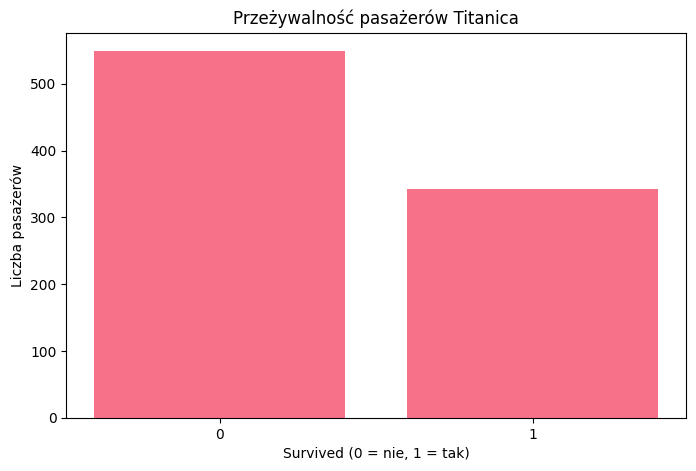


=== PRZEŻYWALNOŚĆ WEDŁUG PŁCI ===


sex
female    0.742038
male      0.188908
Name: survived, dtype: float64

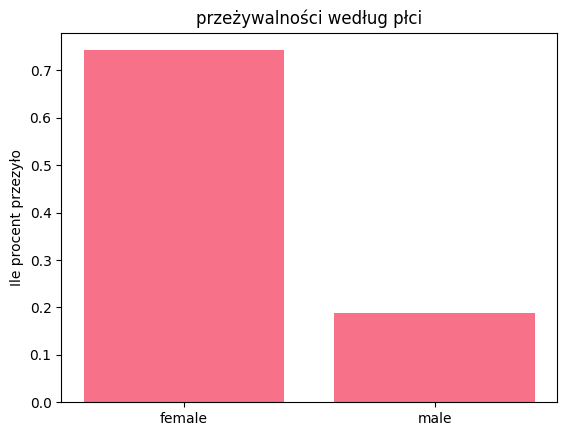

In [57]:
# Zadanie 2: Analiza zmiennej docelowej

# TODO 2.1: Sprawdź rozkład zmiennej 'survived'
# Podpowiedź: użyj .value_counts() na kolumnie 'survived'
print("=== ROZKŁAD PRZEŻYWALNOŚCI ===")
print(titanic['survived'].value_counts())

# TODO 2.2: Oblicz procent przeżywalności
# Podpowiedź: użyj .mean() na kolumnie 'survived' (0=zmarł, 1=przeżył)
print("=== procent przeżywalności ===")
print(titanic['survived'].mean())
# TODO 2.3: Stwórz prosty wykres słupkowy przeżywalności
# Podpowiedź: użyj plt.bar() z wartościami z value_counts()
# Dodaj etykiety osi i tytuł
plt.figure(figsize=(8, 5))
plt.bar(titanic['survived'].unique().tolist(), titanic['survived'].value_counts())
plt.xticks(titanic['survived'].unique().tolist(), ["0", "1"])
plt.xlabel("Survived (0 = nie, 1 = tak)")
plt.ylabel("Liczba pasażerów")
plt.title("Przeżywalność pasażerów Titanica")
plt.show()

# TODO 2.4: Sprawdź przeżywalność według płci
# Podpowiedź: użyj .groupby('sex')['survived'].mean()
print("\n=== PRZEŻYWALNOŚĆ WEDŁUG PŁCI ===")
sex_counts = titanic.groupby('sex')['survived'].mean()
display(sex_counts)

# TODO 2.5: Stwórz wykres przeżywalności według płci
# Podpowiedź: użyj plt.bar() do wizualizacji różnic między płciami
plt.bar(sex_counts.index, sex_counts.values)
plt.ylabel("Ile procent przezyło")
plt.title("przeżywalności według płci")
plt.show()

### **Pytania analityczne (Zadanie 2):**

1. **Jaki procent** pasażerów przeżył katastrofę?
2. **Która płeć** miała wyższy wskaźnik przeżywalności?
3. **Czy dane są zbalansowane** pod względem zmiennej docelowej?
4. **Co to oznacza** dla naszego modelu uczenia maszynowego?

In [ ]:
# Odpowiedzi na pytania analityczne (Zadanie 2):

# 1. Procent ocalałych pasażerów:
# Odpowiedź: 342

# 2. Płeć z wyższym wskaźnikiem przeżywalności:
# Odpowiedź: żeńska

# 3. Czy dane są zbalansowane:
# Odpowiedź: nie

# 4. Implikacje dla modelu ML:
# Odpowiedź: najlpeszą metryką będzie F1-score, użyć też recall i precision

## **Zadanie 3: Zaawansowana eksploracja zależności** 🔍📈

Zbadajmy jak różne cechy wpływają na przeżywalność.

In [ ]:
# Zadanie 3: Eksploracja zależności między cechami a przeżywalnością

# TODO 3.1: Przeżywalność według klasy biletu
# Podpowiedź: użyj .groupby('class')['survived'].mean()
print("=== PRZEŻYWALNOŚĆ WEDŁUG KLASY BILETU ===")

# TODO 3.2: Stwórz wykres słupkowy dla klasy biletu
# Podpowiedź: użyj plt.bar() i groupby dla klasy biletu
# Pokaż różnice w przeżywalności między klasami
plt.figure(figsize=(8, 5))

# TODO 3.3: Sprawdź średni wiek ocalałych vs zmarłych
# Podpowiedź: użyj .groupby('survived')['age'].mean()
print("\n=== ŚREDNI WIEK WEDŁUG PRZEŻYWALNOŚCI ===")

# TODO 3.4: Sprawdź średnią cenę biletu ocalałych vs zmarłych
# Podpowiedź: użyj .groupby('survived')['fare'].mean()
print("\n=== ŚREDNIA CENA BILETU WEDŁUG PRZEŻYWALNOŚCI ===")

# TODO 3.5: Przeanalizuj przeżywalność według portu zaokrętowania
# Podpowiedź: użyj .groupby('embarked')['survived'].mean()

# TODO 3.6: Zbadaj wpływ liczby towarzyszących osób (sibsp + parch)
# Podpowiedź: stwórz nową kolumnę family_size i przeanalizuj jej wpływ

### **Wnioski z eksploracji (Zadanie 3):**

Na podstawie wykresów i tabel, jakie wnioski można wyciągnąć? Uzupełnij poniższe stwierdzenia:

In [ ]:
# Wnioski z Zadania 3:

# 1. Która klasa biletu miała najwyższą przeżywalność?
# Odpowiedź: 

# 2. Czy wiek miał wpływ na przeżywalność?
# Odpowiedź: 

# 3. Który port zaokrętowania był "najszczęśliwszy"?
# Odpowiedź: 

# 4. Czy cena biletu korelowała z przeżywalnością?
# Odpowiedź: 

# 5. Jak liczba towarzyszących osób wpływała na szanse przeżycia?
# Odpowiedź: 

## **Zadanie 4: Przygotowanie danych do modelowania** 🔧

Teraz przygotujemy dane do uczenia maszynowego - obsłużymy brakujące wartości i przekształcimy zmienne kategoryczne.

In [ ]:
# Zadanie 4: Przygotowanie danych

# TODO 4.1: Stwórz kopię danych do przetwarzania
# Podpowiedź: użyj .copy() aby stworzyć kopię DataFrame'a titanic

print("=== STAN PRZED PRZETWARZANIEM ===")
print("Brakujące wartości:")
# TODO: Sprawdź brakujące wartości w danych
# Podpowiedź: użyj .isnull().sum()

# TODO 4.2: Uzupełnij brakujące wartości wieku medianą
# Podpowiedź: oblicz medianę wieku, a następnie użyj fillna() 
# Wyświetl informację o uzupełnieniu

# TODO 4.3: Uzupełnij port zaokrętowania najczęstszą wartością
# Podpowiedź: użyj .mode()[0] aby znaleźć najczęstszą wartość
# Wyświetl informację o uzupełnieniu

# TODO 4.4: Zakoduj płeć (female=0, male=1)
# Podpowiedź: zaimportuj LabelEncoder i użyj fit_transform()
# Stwórz nową kolumnę 'sex_encoded'

# TODO 4.5: Zakoduj port zaokrętowania
# Podpowiedź: analogicznie jak płeć, stwórz kolumnę 'embarked_encoded'

# TODO 4.6: Wybierz cechy do modelowania
# Podpowiedź: użyj kolumn: 'pclass', 'sex_encoded', 'age', 'sibsp', 'parch', 'fare', 'embarked_encoded'
# Stwórz macierz cech X i wektor etykiet y

# TODO 4.7: Sprawdź finalne rozmiary danych
# Podpowiedź: wyświetl kształty X i y oraz nazwy wybranych cech

### **Pytania kontrolne (Zadanie 4):**

1. **Dlaczego** uzupełniliśmy brakujące wartości wieku medianą zamiast średnią?
2. **Co oznacza** kodowanie zmiennych kategorycznych i dlaczego jest konieczne?
3. **Które cechy** wybraliśmy do modelowania i dlaczego?

In [ ]:
# Odpowiedzi na pytania kontrolne (Zadanie 4):

# 1. Dlaczego mediana zamiast średnia dla wieku?
# Odpowiedź: 

# 2. Co to jest kodowanie zmiennych kategorycznych?
# Odpowiedź: 

# 3. Uzasadnienie wyboru cech:
# Odpowiedź: 

## **Zadanie 5: Podział danych i pierwszy model** 🤖

Podzielimy dane na zbiory treningowy i testowy, a następnie stworzymy pierwszy model.

In [ ]:
# Zadanie 5: Podział danych i trenowanie pierwszego modelu

# TODO 5.1: Podziel dane na zbiory treningowy i testowy (80/20)
# Podpowiedź: zaimportuj train_test_split i użyj parametrów:
# - test_size=0.2 (20% na testy)
# - random_state=42 (dla powtarzalności)
# - stratify=y (zachowanie proporcji klas)

print("=== PODZIAŁ DANYCH ===")
# TODO: Wyświetl rozmiary zbiorów
# Podpowiedź: wyświetl X_train.shape[0] i X_test.shape[0]

# TODO 5.2: Stwórz i wytrenuj model Random Forest
# Podpowiedź: zaimportuj RandomForestClassifier i użyj parametrów:
# - n_estimators=100 (ilość drzew)
# - random_state=42
# Następnie użyj .fit() do wytrenowania

print("\n=== TRENOWANIE MODELU RANDOM FOREST ===")

# TODO 5.3: Zrób predykcje na obu zbiorach
# Podpowiedź: użyj .predict() dla zbioru treningowego i testowego

# TODO 5.4: Oblicz accuracy
# Podpowiedź: zaimportuj accuracy_score i oblicz dla obu zbiorów
# Wyświetl wyniki i różnicę (potencjalny overfitting)

# TODO 5.5: Sprawdź ważność cech
# Podpowiedź: użyj .feature_importances_ i stwórz DataFrame
# Posortuj wyniki malejąco i wyświetl

# TODO 5.6: Stwórz wykres ważności cech
# Podpowiedź: użyj plt.figure() i plt.barh() do stworzenia wykresu poziomego
# Dodaj tytuł, etykiety i odwróć oś Y

### **Analiza pierwszego modelu (Zadanie 5):**

Odpowiedz na następujące pytania na podstawie wyników:

In [ ]:
# Analiza pierwszego modelu (Zadanie 5):

# 1. Czy model wykazuje oznaki overfittingu? Uzasadnij.
# Odpowiedź: 

# 2. Która cecha jest najważniejsza dla przewidywania przeżywalności?
# Odpowiedź: 

# 3. Czy accuracy ~80% to dobry wynik? Co można by poprawić?
# Odpowiedź: 

# 4. Dlaczego użyliśmy parametru stratify=y przy podziale danych?
# Odpowiedź: 

## **Zadanie 6: Porównanie różnych algorytmów** ⚔️

Przetestujemy kilka różnych algorytmów klasyfikacji i porównamy ich wyniki.

In [ ]:
# Zadanie 6: Porównanie różnych algorytmów klasyfikacji

# TODO 6.1: Zdefiniuj modele do porównania
# Podpowiedź: stwórz słownik z modelami: RandomForest, LogisticRegression, DecisionTree, KNeighbors
# Użyj nazw jako klucze, a instancje modeli jako wartości

# TODO 6.2: Pętla trenowania i oceny każdego modelu
# Podpowiedź: iteruj po modelach, wytrenuj każdy, zrób predykcje i oblicz metryki
# Zapisz wyniki w liście słowników zawierających: Model, Train Accuracy, Test Accuracy, Precision, Recall, F1-Score, Overfitting

# TODO 6.3: Stwórz DataFrame z wynikami i wyświetl
# Podpowiedź: użyj pd.DataFrame() do stworzenia tabeli wyników

# TODO 6.4: Znajdź najlepszy model
# Podpowiedź: użyj idxmax() na kolumnie F1-Score aby znaleźć najlepszy model

### **Analiza porównania modeli (Zadanie 6):**

Na podstawie wyników powyższego porównania:

In [ ]:
# Analiza porównania modeli (Zadanie 6):

# 1. Który model osiągnął najlepsze wyniki? Dlaczego?
# Odpowiedź: 

# 2. Który model wykazuje największy overfitting?
# Odpowiedź: 

# 3. Czy jest różnica między accuracy a F1-score? Co to oznacza?
# Odpowiedź: 

# 4. Który model byłby najlepszy do wdrożenia w praktyce?
# Odpowiedź: 

# 5. Co można zrobić, żeby poprawić wyniki słabszych modeli?
# Odpowiedź: 

## **Zadanie 7: Szczegółowa analiza najlepszego modelu** 🔍

Przeprowadzimy głębszą analizę najlepszego modelu, włączając macierz konfuzji i raport klasyfikacji.

In [ ]:
# Zadanie 7: Analiza najlepszego modelu

# TODO 7.1: Wybierz najlepszy model na podstawie F1-score
# Podpowiedź: użyj .idxmax() na kolumnie F1-Score z results_df
# Znajdź nazwę modelu i pobierz go ze słownika models

# TODO 7.2: Wytrenuj ponownie najlepszy model i zrób predykcje
# Podpowiedź: użyj .fit() na zbiorze treningowym i .predict() na testowym

# TODO 7.3: Stwórz macierz konfuzji
# Podpowiedź: zaimportuj confusion_matrix i użyj (y_test, y_pred)
# Wyświetl macierz

# TODO 7.4: Stwórz prosty wykres macierzy konfuzji
plt.figure(figsize=(8, 6))
# Podpowiedź: użyj sns.heatmap() z parametrami:
# - annot=True (pokaż wartości)
# - fmt='d' (format liczb całkowitych)
# - cmap='Blues' (kolorystyka)
# - xticklabels i yticklabels = ['Zmarł', 'Przeżył']
# Dodaj tytuł i etykiety osi

# TODO 7.5: Wyświetl raport klasyfikacji
# Podpowiedź: zaimportuj classification_report i użyj z target_names=['Zmarł', 'Przeżył']

# TODO 7.6: Policz podstawowe metryki z macierzy konfuzji
# Podpowiedź: użyj cm.ravel() aby uzyskać tn, fp, fn, tp
# Wyświetl analizę błędów

### **Interpretacja wyników (Zadanie 7):**

Na podstawie szczegółowej analizy najlepszego modelu:

In [ ]:
# Interpretacja wyników (Zadanie 7):

# 1. Ile osób model błędnie przewidział jako ocalałe (False Positives)?
# Odpowiedź: 

# 2. Ile osób model błędnie przewidział jako zmarłe (False Negatives)?
# Odpowiedź: 

# 3. Który typ błędu jest "gorszy" w kontekście Titanica i dlaczego?
# Odpowiedź: 

# 4. Jaka jest specyficzność modelu i co ona oznacza?
# Odpowiedź: 

# 5. Czy model lepiej radzi sobie z przewidywaniem śmierci czy przeżycia?
# Odpowiedź: 

## **Zadanie 8: Walidacja krzyżowa** 🔄

Użyjemy walidacji krzyżowej, aby uzyskać bardziej wiarygodną ocenę modelu.

In [ ]:
# Zadanie 8: Walidacja krzyżowa

print("=== WALIDACJA KRZYŻOWA ===")

# TODO 8.1: Przeprowadź walidację krzyżową dla najlepszego modelu
# Podpowiedź: użyj cross_val_score z cv=5, scoring='accuracy'
# Wyświetl wyniki dla każdego fold'a

# TODO 8.2: Oblicz statystyki walidacji krzyżowej
# Podpowiedź: oblicz średnią i odchylenie standardowe wyników

# TODO 8.3: Przeprowadź walidację krzyżową dla wszystkich modeli
print(f"\n=== PORÓWNANIE WSZYSTKICH MODELI Z WALIDACJĄ KRZYŻOWĄ ===")
# Podpowiedź: dla każdego modelu oblicz wyniki walidacji krzyżowej
# Zapisz wyniki w liście i wyświetl

# TODO 8.4: Porównaj wyniki test vs walidacja krzyżowa
# Podpowiedź: połącz wyniki z poprzedniego zadania z wynikami walidacji krzyżowej
# Użyj merge() aby stworzyć jedną tabelę porównawczą

# TODO 8.5: Znajdź najbardziej stabilny model
# Podpowiedź: model z najmniejszym odchyleniem standardowym

# TODO 8.6: Stwórz prosty wykres porównujący wyniki
plt.figure(figsize=(10, 6))
# Podpowiedź: użyj plt.bar() aby porównać Test Accuracy vs CV Mean
# Dodaj etykiety, tytuł i legendę

### **Wnioski z walidacji krzyżowej (Zadanie 8):**

In [ ]:
# Wnioski z walidacji krzyżowej (Zadanie 8):

# 1. Czy walidacja krzyżowa potwierdza wyniki na zbiorze testowym?
# Odpowiedź: 

# 2. Który model jest najbardziej stabilny (najmniejsze odchylenie standardowe)?
# Odpowiedź: 

# 3. Czy któryś model wykazuje dużą niestabilność? Co to może oznaczać?
# Odpowiedź: 

# 4. Dlaczego walidacja krzyżowa jest lepsza niż jednorazowy podział train/test?
# Odpowiedź: 

## **Zadanie 9: Analiza krzywych uczenia** 📚

Przeanalizujemy krzywe uczenia, aby zrozumieć zachowanie modelu w zależności od rozmiaru danych treningowych.

In [ ]:
# Zadanie 9: Krzywe uczenia

# TODO 9.1: Zaimportuj learning_curve
# Podpowiedź: importuj learning_curve z sklearn.model_selection

print("=== ANALIZA KRZYWYCH UCZENIA ===")

# TODO 9.2: Wygeneruj krzywe uczenia dla najlepszego modelu
# Podpowiedź: użyj learning_curve z parametrami:
# - cv=5 (walidacja krzyżowa)
# - train_sizes=np.linspace(0.1, 1.0, 10) (10 różnych rozmiarów zbiorów)
# - scoring='accuracy'
# - random_state=42
# Funkcja zwróci train_sizes, train_scores, val_scores

# TODO 9.3: Oblicz średnie i odchylenia standardowe
# Podpowiedź: użyj np.mean() i np.std() z axis=1 dla train_scores i val_scores
# Wyświetl informacje o modelu i rozmiarach zbiorów treningowych

# TODO 9.4: Stwórz wykres krzywych uczenia
plt.figure(figsize=(10, 6))
# Podpowiedź: użyj plt.plot() aby narysować dwie linie:
# - train_sizes vs train_scores_mean (kolor niebieski, label='Wynik treningowy')
# - train_sizes vs val_scores_mean (kolor czerwony, label='Wynik walidacyjny')
# Dodaj xlabel, ylabel, title, legend i grid

# TODO 9.5: Przeanalizuj lukę między krzywymi (overfitting)
# Podpowiedź: oblicz różnicę między train_scores_mean a val_scores_mean
# Sprawdź czy model ma overfitting na podstawie wielkości luki:
# - jeśli luka > 0.05: prawdopodobny overfitting
# - jeśli luka < 0.02: dobra generalizacja
# - pomiędzy: umiarkowany overfitting

### **Interpretacja krzywych uczenia (Zadanie 9):**

In [ ]:
# Interpretacja krzywych uczenia (Zadanie 9):

# 1. Czy model ma problem z overfittingiem? Uzasadnij na podstawie krzywych.
# Odpowiedź: 

# 2. Czy zwiększenie ilości danych treningowych może poprawić wyniki?
# Odpowiedź: 

# 3. Jak interpretować zbieganie się krzywych treningowej i walidacyjnej?
# Odpowiedź: 

# 4. (Jeśli dotyczy) Jaka jest optymalna liczba drzew dla Random Forest?
# Odpowiedź: 

# 5. Co można zrobić, aby zmniejszyć overfitting w tym modelu?
# Odpowiedź: 

## **Zadanie 10: Podsumowanie i wnioski końcowe** 🎯

Podsumujmy nasze doświadczenia z uczeniem maszynowym na danych Titanic.

In [1]:
# Zadanie 10: Podsumowanie projektu

# TODO 10.1: Stwórz podsumowanie danych
print("=" * 80)
print("😢 PODSUMOWANIE PROJEKTU TITANIC - UCZENIE MASZYNOWE")
print("=" * 80)

print(f"\n📊 DANE:")
# TODO: Wyświetl podstawowe statystyki danych
# Podpowiedź: wyświetl liczbę pasażerów, liczbę cech i procent ocalałych

# TODO 10.2: Podsumuj wyniki modeli
print(f"\n🤖 MODELE:")
# TODO: Posortuj modele po F1-Score i wyświetl ranking
# Podpowiedź: użyj sort_values() na results_df i stwórz ranking z emoji (🥇🥈🥉)

# TODO 10.3: Najważniejsze odkrycia
print(f"\n🔍 KLUCZOWE ODKRYCIA:")
# TODO: Znajdź najważniejszą cechę i dodaj własne obserwacje
# Podpowiedź: użyj feature_importance z wcześniejszych analiz
# Dodaj obserwacje o wpływie płci, klasy biletu itp.

# TODO 10.4: Stwórz finalne podsumowanie
print(f"\n🎯 OSIĄGNIĘTE CELE UCZENIA:")
print(f"   ✅ Przeszliśmy przez cały pipeline ML")
print(f"   ✅ Przetestowaliśmy różne algorytmy")
print(f"   ✅ Zastosowaliśmy różne metryki oceny")
print(f"   ✅ Przeanalizowaliśmy overfitting")
print(f"   ✅ Użyliśmy walidacji krzyżowej")

print(f"\n💡 DALSZE KROKI:")
print(f"   • Tuning hiperparametrów")
print(f"   • Feature engineering (tworzenie nowych cech)")
print(f"   • Ensemble methods")
print(f"   • Analiza błędnych predykcji")
print(f"   • Wdrożenie modelu w praktyce")

😢 PODSUMOWANIE PROJEKTU TITANIC - UCZENIE MASZYNOWE

📊 DANE:

🤖 MODELE:

🔍 KLUCZOWE ODKRYCIA:

🎯 OSIĄGNIĘTE CELE UCZENIA:
   ✅ Przeszliśmy przez cały pipeline ML
   ✅ Przetestowaliśmy różne algorytmy
   ✅ Zastosowaliśmy różne metryki oceny
   ✅ Przeanalizowaliśmy overfitting
   ✅ Użyliśmy walidacji krzyżowej

💡 DALSZE KROKI:
   • Tuning hiperparametrów
   • Feature engineering (tworzenie nowych cech)
   • Ensemble methods
   • Analiza błędnych predykcji
   • Wdrożenie modelu w praktyce


### **Refleksja końcowa (Zadanie 10):**

Odpowiedz na następujące pytania podsumowujące:

In [ ]:
# Refleksja końcowa (Zadanie 10):

# 1. Który etap projektu ML był najtrudniejszy i dlaczego?
# Odpowiedź: 

# 2. Czy końcowe wyniki (accuracy ~80%) są zadowalające? Uzasadnij.
# Odpowiedź: 

# 3. Które czynniki miały największy wpływ na przeżywalność na Titanicu?
# Odpowiedź: 

# 4. Jakie dodatkowe cechy mogłyby poprawić model?
# Odpowiedź: 

# 5. Czego nauczyłeś się o uczeniu maszynowym wykonując te ćwiczenia?
# Odpowiedź: 

# 6. Jakie są główne wyzwania przy wdrażaniu modeli ML w praktyce?
# Odpowiedź: 

print("🎉 GRATULACJE! Ukończyłeś kompletny projekt uczenia maszynowego!")
print("Teraz jesteś gotowy do pracy z własnymi zbiorami danych!")

## **Bonusowe zadania dla chętnych** 🌟

Jeśli chcesz pogłębić swoją wiedzę, spróbuj następujących zadań:

### **Zadanie Bonus 1: Feature Engineering**
- Stwórz nową cechę `family_size` = `sibsp` + `parch` + 1
- Stwórz cechę `is_alone` (boolean) na podstawie `family_size`
- Sprawdź czy te cechy poprawiają wyniki modelu

### **Zadanie Bonus 2: Tuning hiperparametrów**
- Użyj `GridSearchCV` do znalezienia optymalnych parametrów dla najlepszego modelu
- Przetestuj różne wartości głównych hiperparametrów

### **Zadanie Bonus 3: Ensemble Methods**
- Stwórz model głosujący (`VotingClassifier`) z najlepszych modeli
- Porównaj wyniki z pojedynczymi modelami

### **Zadanie Bonus 4: Analiza błędów**
- Przeprowadź głębszą analizę błędnie sklasyfikowanych przypadków
- Znajdź wzorce w błędach modelu

### **Zadanie Bonus 5: Interpretacja modelu**
- Użyj biblioteki `shap` do interpretacji predykcji
- Przeanalizuj, które cechy są najważniejsze dla konkretnych predykcji

In [ ]:
# Miejsce na rozwiązania zadań bonusowych

# Bonus 1: Feature Engineering
# TODO: Implementuj nowe cechy

# Bonus 2: Tuning hiperparametrów  
# TODO: Użyj GridSearchCV

# Bonus 3: Ensemble Methods
# TODO: Stwórz VotingClassifier

# Bonus 4: Analiza błędów
# TODO: Przeanalizuj błędne predykcje

# Bonus 5: Interpretacja modelu
# TODO: Użyj SHAP lub inne narzędzia

print("Powodzenia w rozwiązywaniu zadań bonusowych! 🚀")